Используя API VK (https://vk.com/dev), загрузить все фотографии (нормального размера) из всех альбомов страницы НИУ ВШЭ-Пермь. 

In [1]:
#!pip install vk_requests

In [2]:
from urllib.request import urlretrieve
import time 
import os
import vk_requests
import math
import datetime
import pandas as pd
import seaborn
import random
import networkx
import warnings

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
#pip install matplotlib --force-reinstall --user

In [4]:
vkapi = vk_requests.create_api(service_token='')

#id нужного сообщества
owner_id = '-132'

albums = vkapi.photos.getAlbums(owner_id=owner_id)
albums_count = albums["count"]

total_photos_count = 0 # всего фото в альбомах
counter = 0 # текущий счетчик
prog = 0 # процент загруженных
breaked = 0 # не загружено из-за ошибки
time_now = time.time() # время старта

#Создадим каталог
if not os.path.exists('LR2_downloaded_photos'):
    os.mkdir('LR2_downloaded_photos')

for i in range(albums_count):
    album_id = albums["items"][i]["id"]
    photos_count = albums["items"][i]["size"]
    total_photos_count += photos_count
    
    photo_folder = 'LR2_downloaded_photos/{0}'.format(albums["items"][i]["title"])
    if not os.path.exists(photo_folder):
        os.mkdir(photo_folder)

    for j in range(math.ceil(photos_count / 1000)): # Подсчитаем,сколько раз нужно получать список фото, так как число получится не целое - округляем в большую сторону
        photos = vkapi.photos.get(owner_id=owner_id, album_id=album_id, count=1000, offset=j*1000) #Получаем список фото
        for photo in photos["items"]:
            counter += 1
            url = photo["sizes"][0]["url"] # Получаем адрес изображения
            print('Загружаю фото № {} из {}. Прогресс: {} %'.format(counter, photos_count, prog))
            prog = round(100/photos_count*counter,2)
            try:
                urlretrieve(url, photo_folder + "/" + os.path.split(url)[1]) # Загружаем и сохраняем файл
            except Exception:
                print('Произошла ошибка, файл пропущен.')
                breaked += 1
                continue
    counter = 0

time_for_dw = time.time() - time_now
print("\nВ очереди было {} файлов. Из них удачно загружено {} файлов, {} не удалось загрузить. Затрачено времени: {} сек.". format(total_photos_count, total_photos_count-breaked, breaked, round(time_for_dw,1)))

Загружаю фото № 1 из 1. Прогресс: 0 %
Произошла ошибка, файл пропущен.
Загружаю фото № 1 из 13. Прогресс: 100.0 %
Загружаю фото № 2 из 13. Прогресс: 7.69 %
Загружаю фото № 3 из 13. Прогресс: 15.38 %
Загружаю фото № 4 из 13. Прогресс: 23.08 %
Загружаю фото № 5 из 13. Прогресс: 30.77 %
Загружаю фото № 6 из 13. Прогресс: 38.46 %
Загружаю фото № 7 из 13. Прогресс: 46.15 %
Загружаю фото № 8 из 13. Прогресс: 53.85 %
Загружаю фото № 9 из 13. Прогресс: 61.54 %
Загружаю фото № 10 из 13. Прогресс: 69.23 %
Загружаю фото № 11 из 13. Прогресс: 76.92 %
Загружаю фото № 12 из 13. Прогресс: 84.62 %
Загружаю фото № 13 из 13. Прогресс: 92.31 %
Произошла ошибка, файл пропущен.
Загружаю фото № 1 из 50. Прогресс: 100.0 %
Произошла ошибка, файл пропущен.
Загружаю фото № 2 из 50. Прогресс: 2.0 %
Произошла ошибка, файл пропущен.
Загружаю фото № 3 из 50. Прогресс: 4.0 %
Произошла ошибка, файл пропущен.
Загружаю фото № 4 из 50. Прогресс: 6.0 %
Произошла ошибка, файл пропущен.
Загружаю фото № 5 из 50. Прогресс: 8

Загружаю фото № 51 из 138. Прогресс: 36.23 %
Загружаю фото № 52 из 138. Прогресс: 36.96 %
Загружаю фото № 53 из 138. Прогресс: 37.68 %
Загружаю фото № 54 из 138. Прогресс: 38.41 %
Загружаю фото № 55 из 138. Прогресс: 39.13 %
Загружаю фото № 56 из 138. Прогресс: 39.86 %
Загружаю фото № 57 из 138. Прогресс: 40.58 %
Загружаю фото № 58 из 138. Прогресс: 41.3 %
Загружаю фото № 59 из 138. Прогресс: 42.03 %
Загружаю фото № 60 из 138. Прогресс: 42.75 %
Загружаю фото № 61 из 138. Прогресс: 43.48 %
Загружаю фото № 62 из 138. Прогресс: 44.2 %
Загружаю фото № 63 из 138. Прогресс: 44.93 %
Загружаю фото № 64 из 138. Прогресс: 45.65 %
Загружаю фото № 65 из 138. Прогресс: 46.38 %
Загружаю фото № 66 из 138. Прогресс: 47.1 %
Загружаю фото № 67 из 138. Прогресс: 47.83 %
Загружаю фото № 68 из 138. Прогресс: 48.55 %
Загружаю фото № 69 из 138. Прогресс: 49.28 %
Загружаю фото № 70 из 138. Прогресс: 50.0 %
Загружаю фото № 71 из 138. Прогресс: 50.72 %
Загружаю фото № 72 из 138. Прогресс: 51.45 %
Загружаю фото 

Выбрать две группы ВК для исследования. Проанализировать данные об их подписчиках (возраст, пол и т.д.). Сравнить группы между собой (пересечение пользователей, регион и т.д.)

In [5]:
def getAge(birthDate):
    age = -1
    
    if not pd.isnull(birthDate):   
        today = datetime.date.today()
        age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day))
 
    return age

In [6]:
def getMembersDataFrame(group_id):
    results = []
    
    group = vkapi.groups.getById(group_id=group_id, fields='members_count')
    members_count = group[0]['members_count']
    
    for i in range(math.ceil(members_count / 1000)):
        response = vkapi.groups.getMembers(group_id=group_id, count=1000, offset=i*1000, fields='bdate,sex,city')
        results.extend(response["items"])
        time.sleep(0.33)
    
    df = pd.json_normalize(results)
    df['group_id'] = group_id
    df['group_name'] = group[0]['name']
    df = df.dropna(axis='index', how='any')
    df = df.drop(df[df['city.title']==''].index)
    df.loc[df.sex == 2, 'sex'] = 'м'
    df.loc[df.sex == 1, 'sex'] = 'ж'
    df['bdate'] = pd.to_datetime(df['bdate'], errors='coerce', dayfirst=True)
    df['age'] = df['bdate'].apply(getAge)
    
    return df

In [7]:
group_memes = 'vkidbutovsky' # Постироничные мемы
group_humour = 'smehvg'      # Шутки для старшего поколения

table = getMembersDataFrame(group_memes)
table2 = getMembersDataFrame(group_humour)

members_df = pd.concat([table, table2])

In [8]:
members_df.shape

(24198, 12)

In [9]:
members_df.head()

,id,bdate,sex,first_name,last_name,can_access_closed,is_closed,city.id,city.title,group_id,group_name,age
1,1184726,1982-12-31,м,Vadim,Vadimoff,True,False,24.0,Балашиха,vkidbutovsky,Щищ,39
4,4284855,1988-12-06,м,Руслан,Файзрахманов,True,False,60.0,Казань,vkidbutovsky,Щищ,33
5,4567648,1986-04-23,ж,Наденька,Писарева,True,False,8.0,Череповец,vkidbutovsky,Щищ,36
7,7292083,1958-05-13,м,Юрий,Мраков,True,False,1.0,Москва,vkidbutovsky,Щищ,64
9,9247772,2007-06-03,м,Ислям,Амиров,True,False,109.0,Пенза,vkidbutovsky,Щищ,15


In [10]:
cross_users = members_df.groupby(['id'], as_index=False)['group_name'].count()
unique_users = cross_users.shape[0]
cross_users = cross_users.drop(cross_users[cross_users['group_name'] < 2].index)

print('Пересечение пользователей: {0} человек ({1}%) подписаны на обе группы'.format(
    cross_users.shape[0], round(cross_users.shape[0]/unique_users*100, 2)))

Пересечение пользователей: 205 человек (0.85%) подписаны на обе группы


[Text(0, 0, '27.4801'), Text(0, 0, '42.1506')]

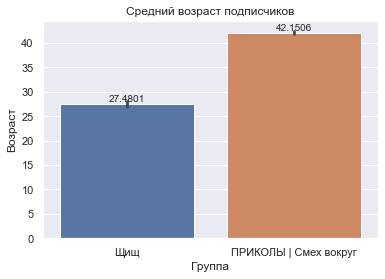

In [11]:
seaborn.set(rc={'figure.figsize':(10.7,7.27)})

plot = seaborn.barplot(x="group_name", y="age", data=members_df[members_df["age"] != -1]);
plot.set_title("Средний возраст подписчиков")
plot.set_ylabel("Возраст")
plot.set_xlabel("Группа")
plot.bar_label(plot.containers[0])

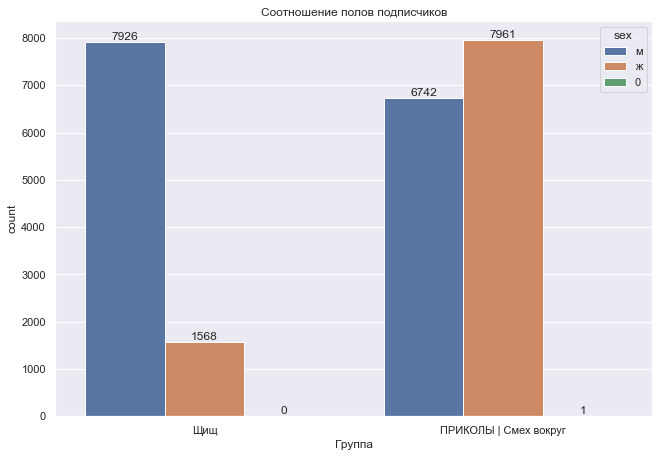

In [12]:
seaborn.set(rc={'figure.figsize':(10.7,7.27)})

plot = seaborn.countplot(x="group_name", hue="sex", data=members_df);
plot.set_title("Соотношение полов подписчиков")
plot.set_xlabel("Группа")
for i in plot.containers:
    plot.bar_label(i,)

In [13]:
members_df[members_df['sex']==0]

,id,bdate,sex,first_name,last_name,can_access_closed,is_closed,city.id,city.title,group_id,group_name,age
11713,373836983,1972-11-30,0,александр,лосев,True,False,37.0,Владивосток,smehvg,ПРИКОЛЫ | Смех вокруг,49


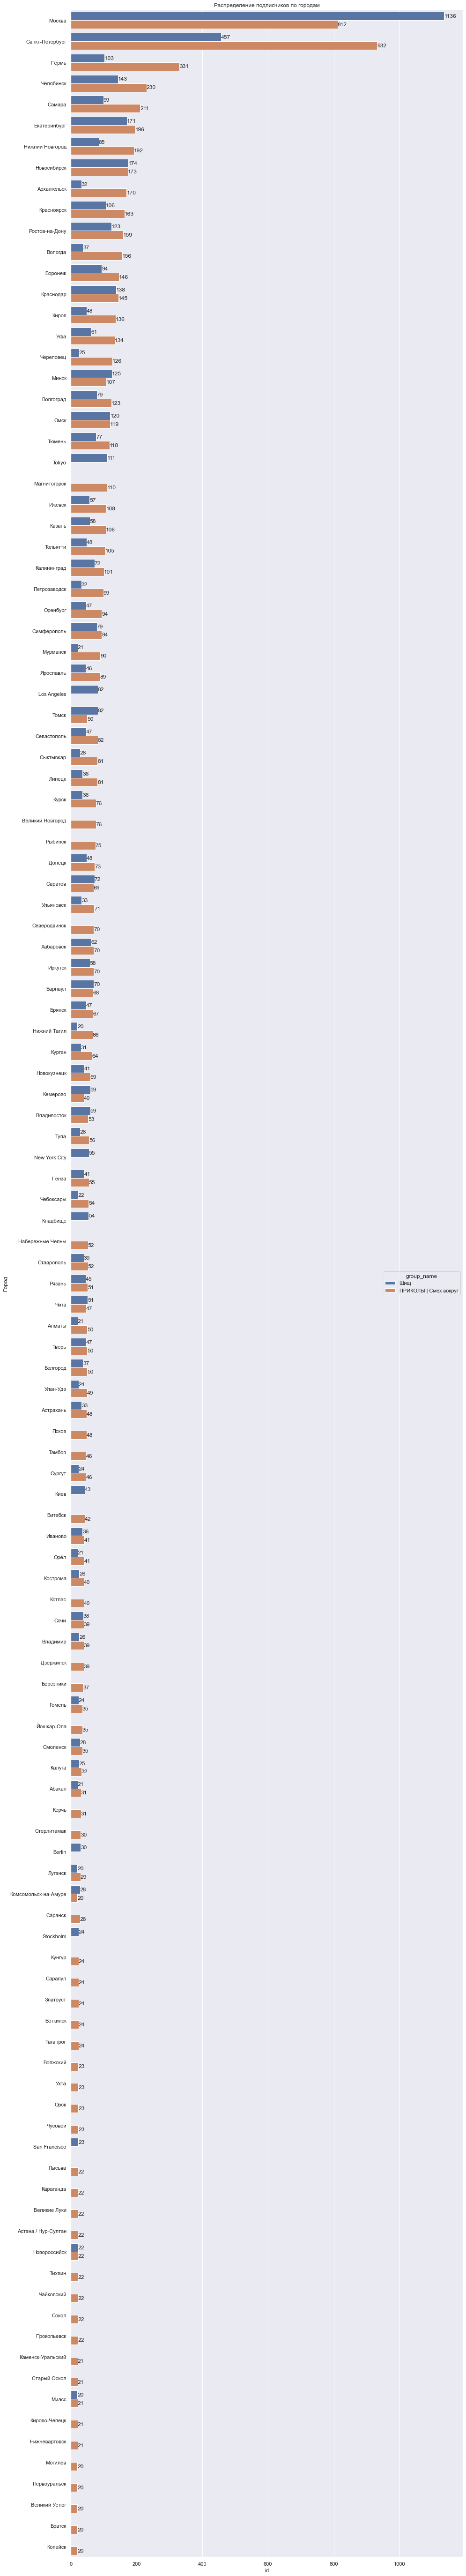

In [14]:
seaborn.set(rc={'figure.figsize':(15,100)})

cities_grouped = members_df.groupby(['group_name','city.title'], as_index=False)['id'].count()
cities_grouped = cities_grouped.drop(cities_grouped[cities_grouped['id'] < 20].index)
cities_grouped.sort_values(by=['id'], inplace=True, ascending=False)

plot = seaborn.barplot(x='id', y="city.title", hue="group_name", data=cities_grouped);
plot.set_title("Распределение подписчиков по городам")
plot.set_ylabel("Город")
for i in plot.containers:
    plot.bar_label(i,)

Визуализировать граф пользователей групп из задания 2

Профиль пользователя 34385142 скрыт, пропускаем.
Профиль пользователя 123387291 скрыт, пропускаем.
Профиль пользователя 164010819 скрыт, пропускаем.
Профиль пользователя 173067318 скрыт, пропускаем.
Профиль пользователя 191200076 скрыт, пропускаем.
Профиль пользователя 200535957 скрыт, пропускаем.
Профиль пользователя 213522432 скрыт, пропускаем.
Профиль пользователя 229714014 скрыт, пропускаем.
Профиль пользователя 242517706 скрыт, пропускаем.
Профиль пользователя 251031528 скрыт, пропускаем.
Профиль пользователя 278336591 скрыт, пропускаем.
Профиль пользователя 291711055 скрыт, пропускаем.
Профиль пользователя 298350502 скрыт, пропускаем.
Профиль пользователя 300118028 скрыт, пропускаем.
Профиль пользователя 320195268 скрыт, пропускаем.
Данные успешно собраны.

(120, 4)

Граф друзей пользователя: Платон Шайдеров


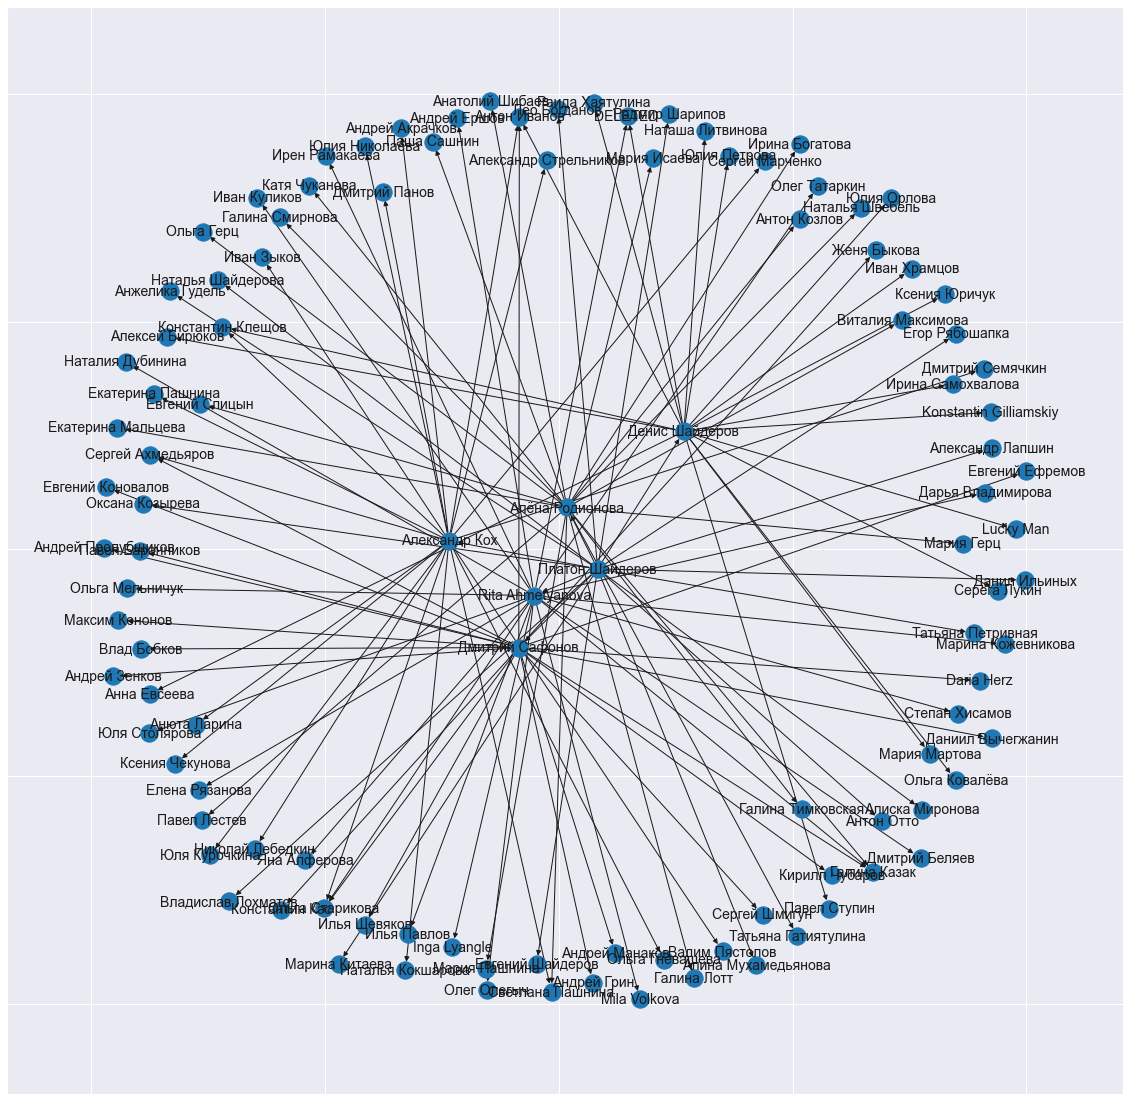

In [49]:
# Выберем случайного пользователя из датасета
# Для него соберем список друзей и друзей друзей
# и визуализируем это с помощью графов networkx

max_friends = 20

idx = random.randrange(members_df.shape[0])
user = members_df.iloc[idx]
friendsJSON = []

try:
    main_response = vkapi.friends.get(user_id=user['id'], count=max_friends, fields='first_name,last_name')
    friendsJSON = main_response['items']
    edges_df = pd.json_normalize(friendsJSON)
    edges_df["user_fullname"] = user['first_name'] + " " + user['last_name']
except:
    print('Профиль пользователя {0} скрыт, работа завершена.'.format(user['id']))
else:
    for record in main_response["items"]:
        try:
            response = vkapi.friends.get(user_id=record['id'], count=max_friends, fields='first_name,last_name')
            friendsJSON = response['items']
            temp_df = pd.json_normalize(friendsJSON)
            temp_df["user_fullname"] = record['first_name'] + " " + record['last_name']
            edges_df = pd.concat([edges_df, temp_df])
        except:
            print('Профиль пользователя {0} скрыт, пропускаем.'.format(record['id']))
            

    edges_df["friend_fullname"] = edges_df["first_name"] + " " + edges_df['last_name']
    edges_df.drop(columns=['first_name','last_name','track_code','can_access_closed',
                               'is_closed'], inplace=True)
    edges_df.rename(columns={"id": "friend_id"}, inplace=True)
    
    print('Данные успешно собраны.')
    print()
    print(edges_df.shape)
    print()
    
    warnings.filterwarnings("ignore")
    seaborn.set(rc={'figure.figsize':(20,20)})

    graph = networkx.from_pandas_edgelist(edges_df, 
                            source='user_fullname',
                            target='friend_fullname',
                            create_using=networkx.DiGraph())
                         
    print('Граф друзей пользователя: {0} {1}'.format(user['first_name'], user['last_name']))
    networkx.draw_networkx(graph, font_size=14)